In [11]:
%matplotlib inline
import iteround
import lib.optimize as opt
import lib.simulation as sim
import lib.budget as budget
import lib.budget as budget
import lib.utils as utils
import lib.geo as geo
import lib.clustering as clustering
import lib.pipeline as pipeline
import lib.optimize.common as opt_common
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn
import functools
import itertools
import multiprocessing
import typing
import os
from multiprocessing import Pool, cpu_count
from datetime import datetime, timedelta, date
from dateutil.relativedelta import relativedelta
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
from tqdm.auto import tqdm
import lib.traffic as trf

#seaborn.set_theme(context='paper', rc={'axes.facecolor': '#CCDDF3'})
#seaborn.set_theme(context='paper', style='dark', rc={'axes.facecolor': 'w'})

In [4]:
DATASET_NAME = "data"
COMPUTED_PERSISTENCE_DIR = "computed"
TEMPORARY_DIR = "tmp"

def fname(what: str, temporary: bool = False) -> str:
    directory = TEMPORARY_DIR if temporary else COMPUTED_PERSISTENCE_DIR
    return f"{directory}/{DATASET_NAME}-{what}.pgz"

# Load Data

In [5]:
charging_stations = utils.gzip_pickle_load('charging_stations.gz')
station_distances_mtx = utils.gzip_pickle_load('station_distances_mtx.gz')
traffic_full = utils.gzip_pickle_load('traffic_full.gz')

# Training Datasets

In [6]:
build_traffic = functools.partial(trf.build_traffic, traffic_full=traffic_full, charging_stations=charging_stations, station_distances_mtx=station_distances_mtx)

In [7]:
traffic_specs = list(utils.factory_subsets(trf.TrafficSpec,
    [
        dict(start_timestamp='2019-03-01', end_timestamp='2019-04-01', max_station_distance=300, max_stations_pair_distance=300, remove_redundant_station_attempts=False),
    ],
    [
        dict(name='vehiclepos-N', subsequent_attempts_by_original_position=True, max_attempts=None),
        dict(name='vehiclepos-3', subsequent_attempts_by_original_position=True, max_attempts=3),
        dict(name='vehiclepos-2', subsequent_attempts_by_original_position=True, max_attempts=2),
        dict(name='attemptpos-3', max_attempts=3),
        dict(name='attemptpos-2', max_attempts=2),
    ]))

In [8]:
traffic_specs

[TrafficSpec('vehiclepos-N', '2019-03-01-to-2019-04-01-300-300-origpos'),
 TrafficSpec('vehiclepos-3', '2019-03-01-to-2019-04-01-3att-300-300-origpos'),
 TrafficSpec('vehiclepos-2', '2019-03-01-to-2019-04-01-2att-300-300-origpos'),
 TrafficSpec('attemptpos-3', '2019-03-01-to-2019-04-01-3att-300-300'),
 TrafficSpec('attemptpos-2', '2019-03-01-to-2019-04-01-2att-300-300')]

plots:   0%|          | 0/5 [00:00<?, ?it/s]

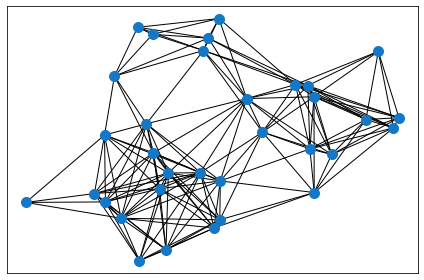

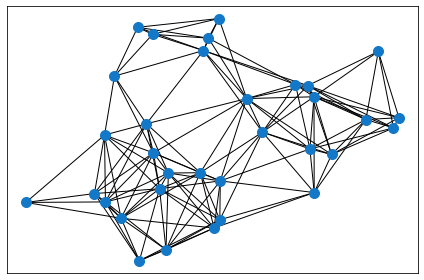

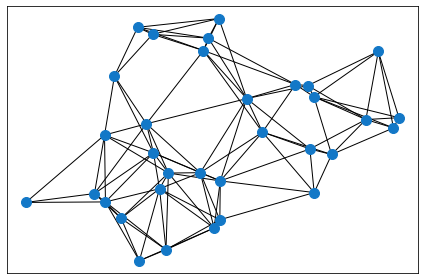

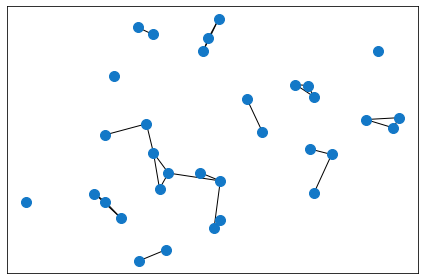

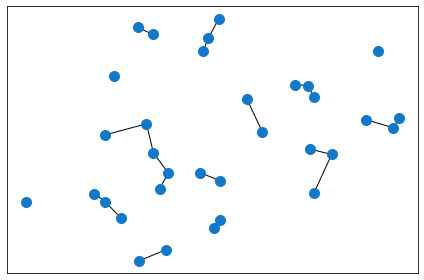

In [13]:
plt.close('all')
plt.ion()
for spec in utils.progressify(traffic_specs, "plots"):
    traffic = build_traffic(spec)
    plt.close('all')
    ax = plt.axes()
    trf.render_attempt_graph(charging_stations, traffic, directed=False, labels=False, color_first=None)
    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.show()
    #plt.savefig(f"plots/pdf/station-dependence-{spec.name}.pdf")